Phân tích mô tả

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import time
from tabulate import tabulate

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all columns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [3]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


In [6]:
file_path = 'Clean_Dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


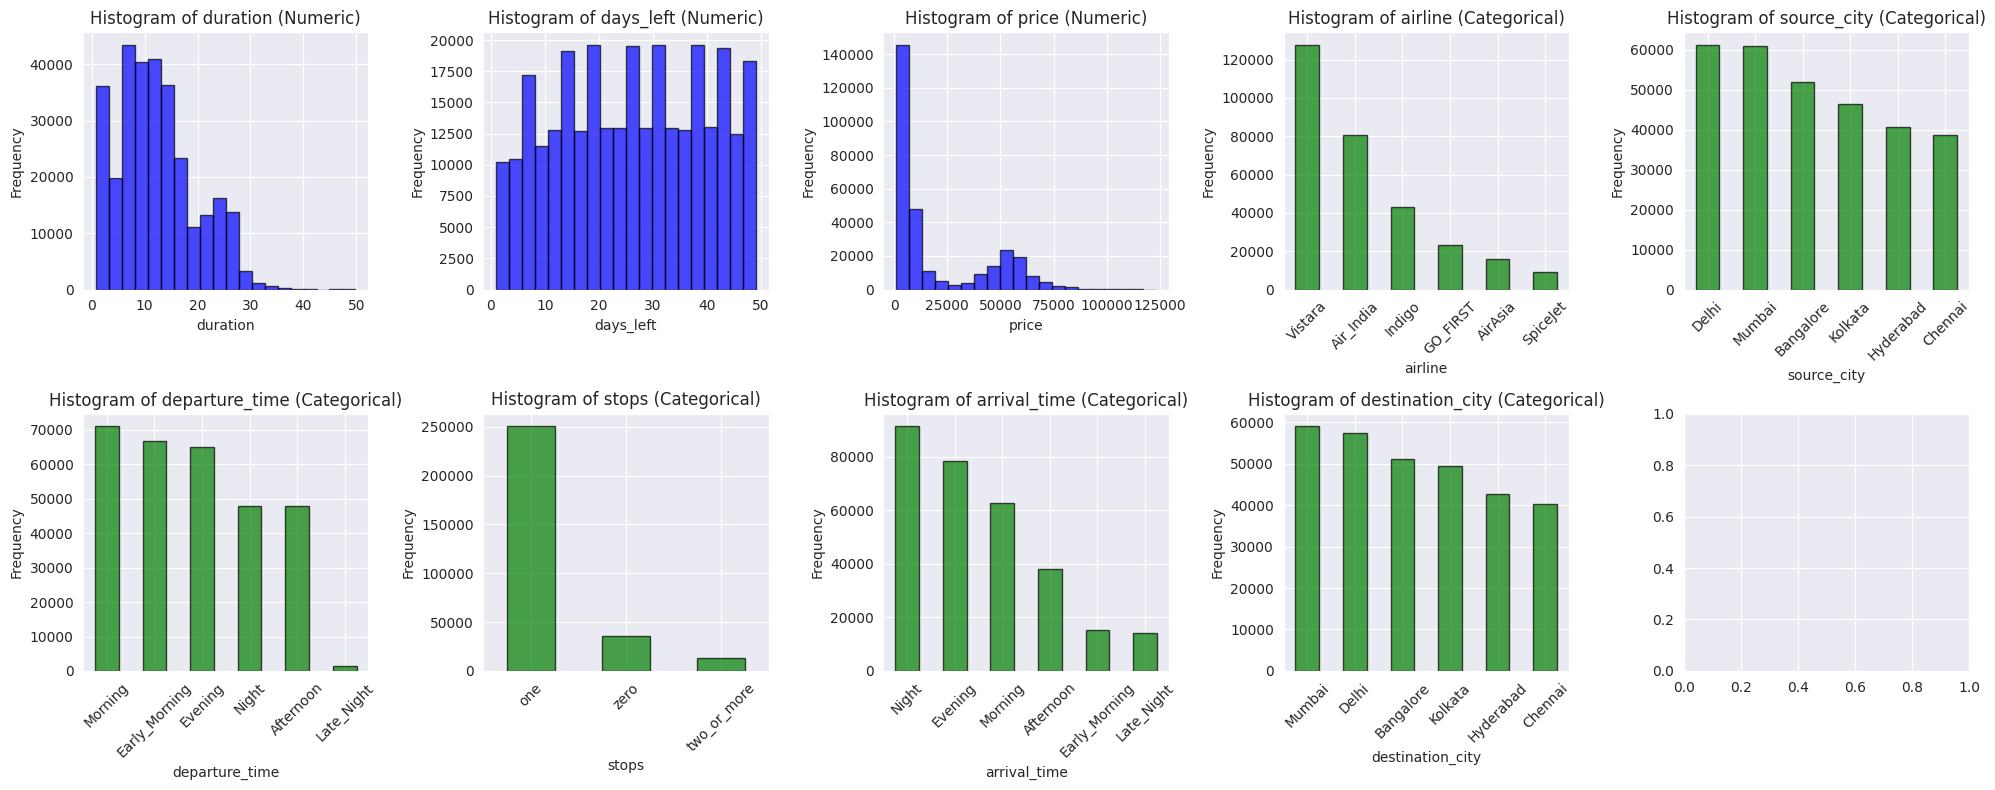

In [ ]:
def plot_histograms(df):
    # Danh sách cột số (numeric features)
    numeric_columns = ['duration', 'days_left', 'price']

    # Danh sách cột phân loại (categorical features)
    categorical_columns = [
        'airline', 'source_city', 'departure_time',
        'stops', 'arrival_time', 'destination_city', 'flight_class'
    ]

    # Tổng hợp danh sách tất cả các cột
    all_columns = numeric_columns + categorical_columns

    # Số lượng biểu đồ cần vẽ
    num_plots = len(all_columns)

    # Khởi tạo layout 4x2
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # Biến đổi mảng 2D thành 1D để duyệt

    for idx, col in enumerate(all_columns):
        if col in df.columns:
            ax = axes[idx]  # Lấy vị trí của trục

            # Vẽ histogram
            if col in numeric_columns:
                ax.hist(df[col].dropna(), bins=20, color='blue', alpha=0.7, edgecolor='black')
                ax.set_title(f"Histogram of {col} (Numeric)")
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
            elif col in categorical_columns:
                df[col].value_counts().plot(kind='bar', color='green', alpha=0.7, edgecolor='black', ax=ax)
                ax.set_title(f"Histogram of {col} (Categorical)")
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Xóa các ô thừa nếu có
    for idx in range(num_plots, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

plot_histograms(data)

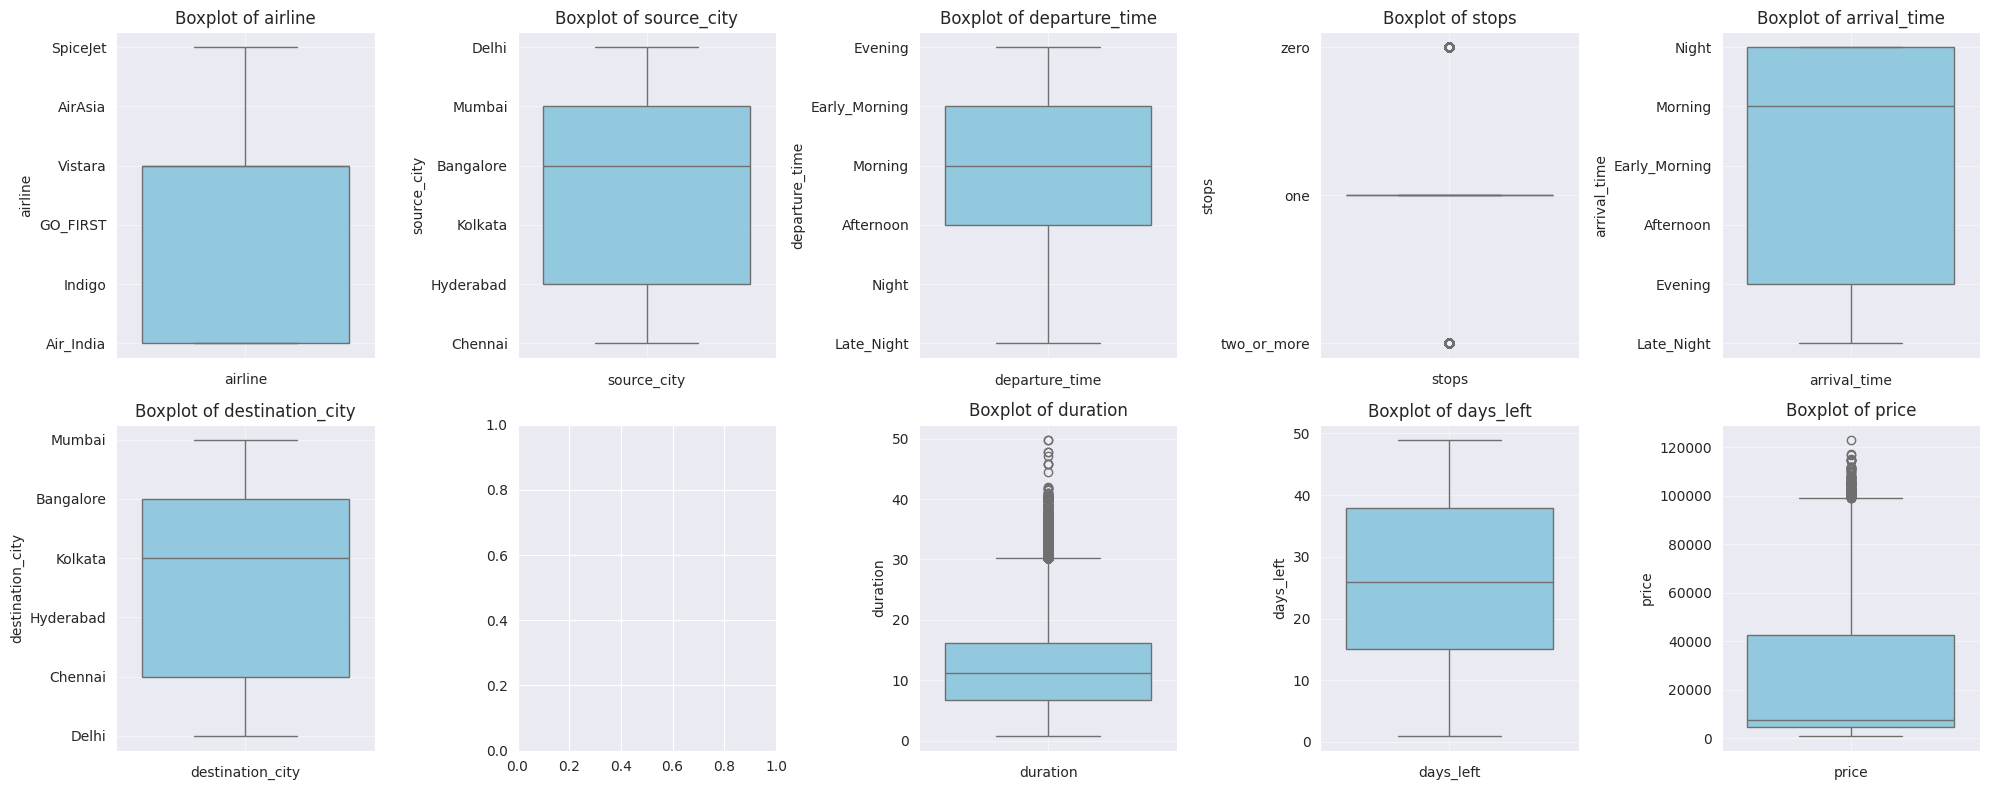

In [ ]:
import math

def plot_boxplot_layout(df, columns_to_plot, nrows=3, ncols=3):
    num_plots = len(columns_to_plot)
    total_plots = nrows * ncols

    # Xác định số lượng figure cần thiết nếu số lượng cột > layout hiện tại
    num_figures = math.ceil(num_plots / total_plots)

    for fig_num in range(num_figures):
        # Tạo figure mới
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 8))
        axes = axes.flatten()  # Chuyển layout 2D thành 1D để dễ duyệt

        # Duyệt qua các cột cần vẽ
        start_idx = fig_num * total_plots
        end_idx = start_idx + total_plots
        for idx, col in enumerate(columns_to_plot[start_idx:end_idx]):
            if col in df.columns:
                sns.boxplot(data=df[col], ax=axes[idx], color='skyblue')
                axes[idx].set_title(f"Boxplot of {col}")
                axes[idx].set_xlabel(col)
                axes[idx].grid(alpha=0.5)

        # Xóa các ô thừa trong layout nếu không đủ dữ liệu
        for idx in range(len(columns_to_plot[start_idx:end_idx]), len(axes)):
            fig.delaxes(axes[idx])

        # Tùy chỉnh layout
        plt.tight_layout()
        plt.show()

plot_boxplot_layout(data, columns_to_plot=[
        'airline', 'source_city', 'departure_time',
        'stops', 'arrival_time', 'destination_city', 'flight_class', 'duration', 'days_left', 'price'
    ], nrows=2, ncols=5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
data.isna().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [9]:
data.drop(columns='Unnamed: 0', inplace=True)

In [10]:
data.rename(columns={'class': 'flight_class'}, inplace=True)

In [11]:
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


In [ ]:
data.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


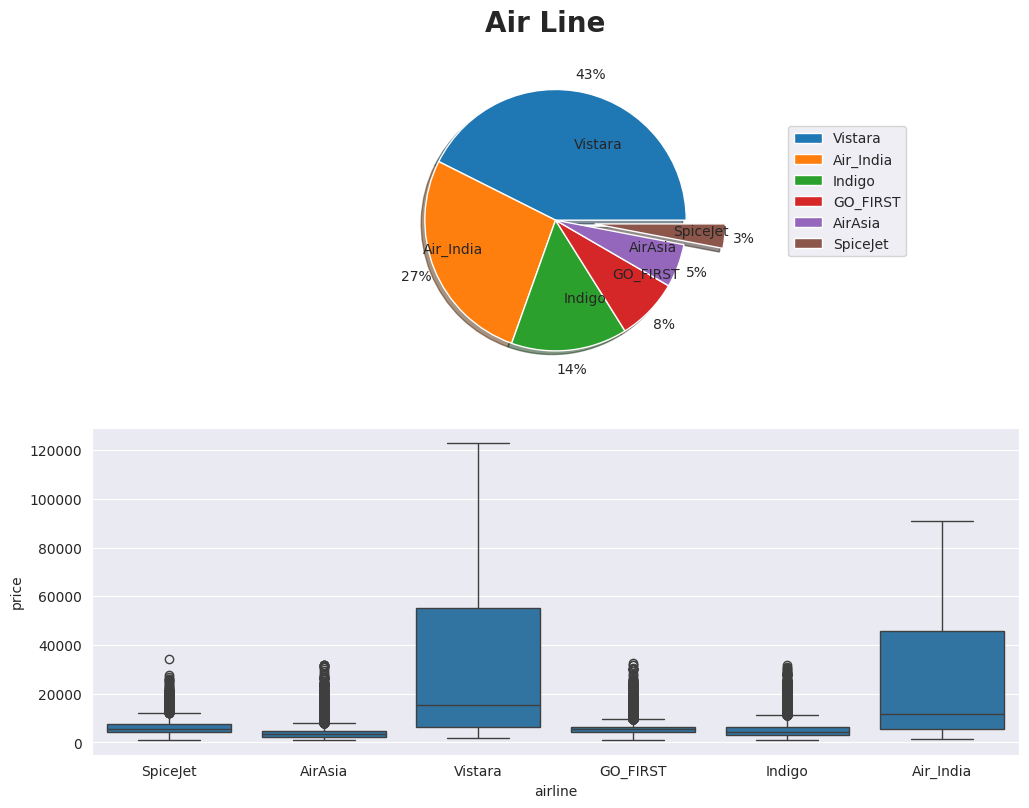

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=data, ax=ax[1])

plt.show()

In [ ]:
len(data.flight.value_counts())

1561

In [12]:
data.drop(columns='flight', inplace=True)

In [ ]:
data.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


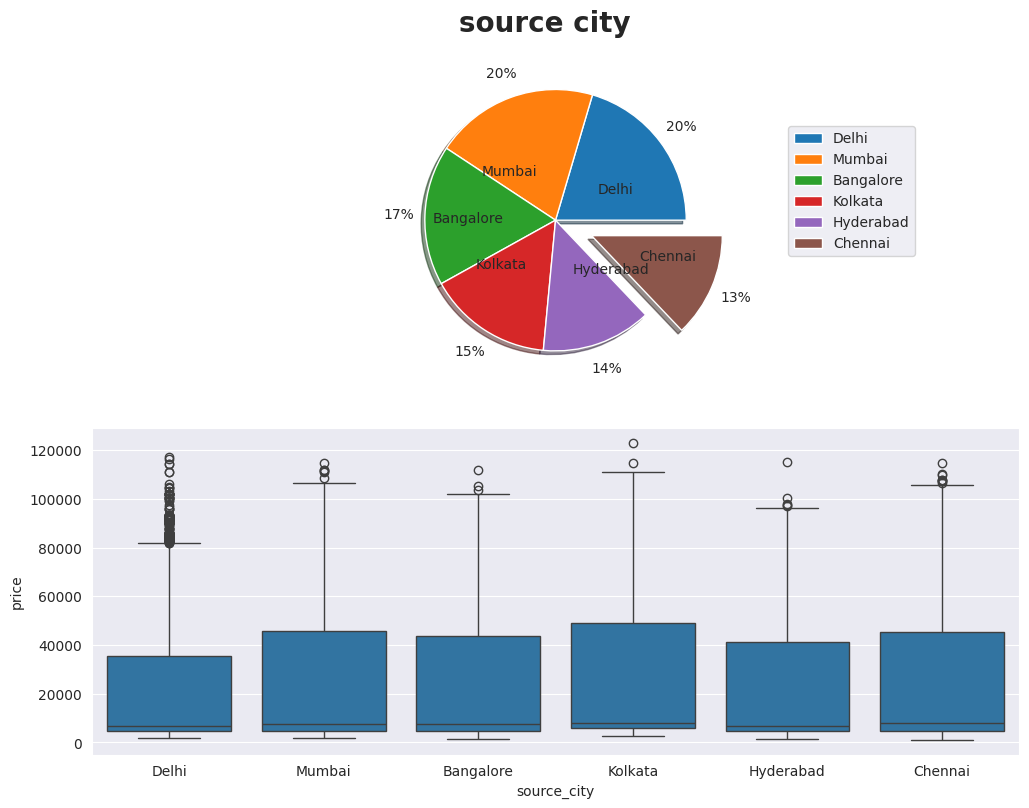

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='source_city', y='price', data=data, ax=ax[1])
plt.show()

In [ ]:
data.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


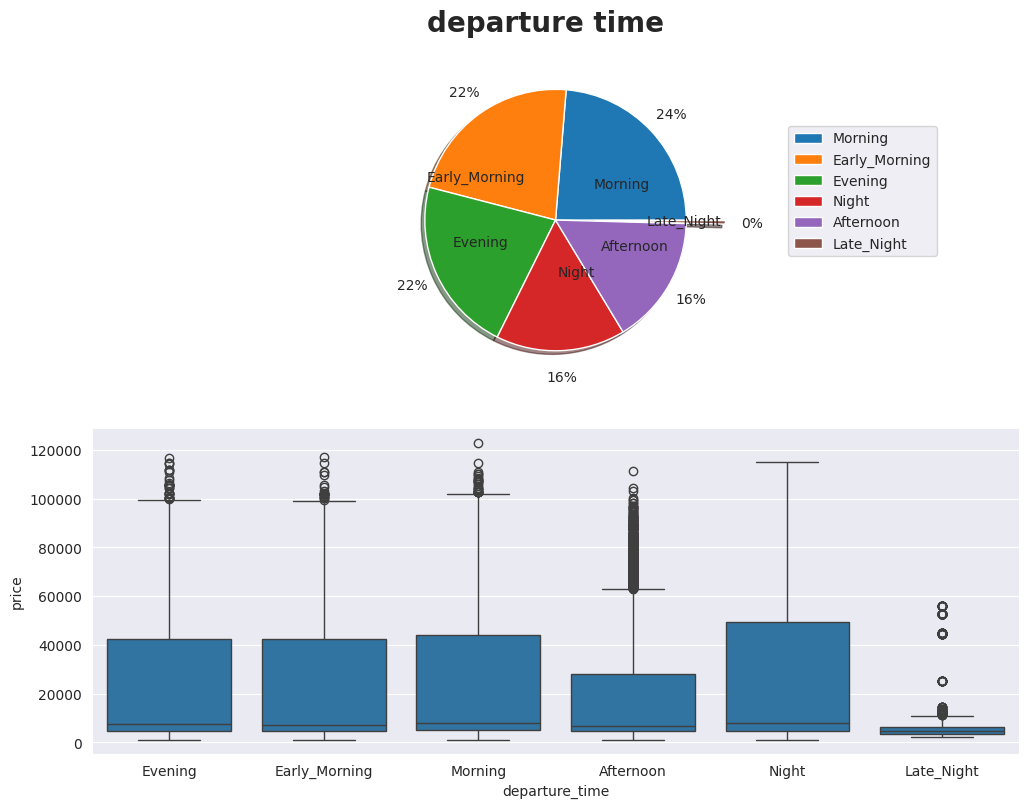

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1])
plt.show()

In [ ]:
data.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


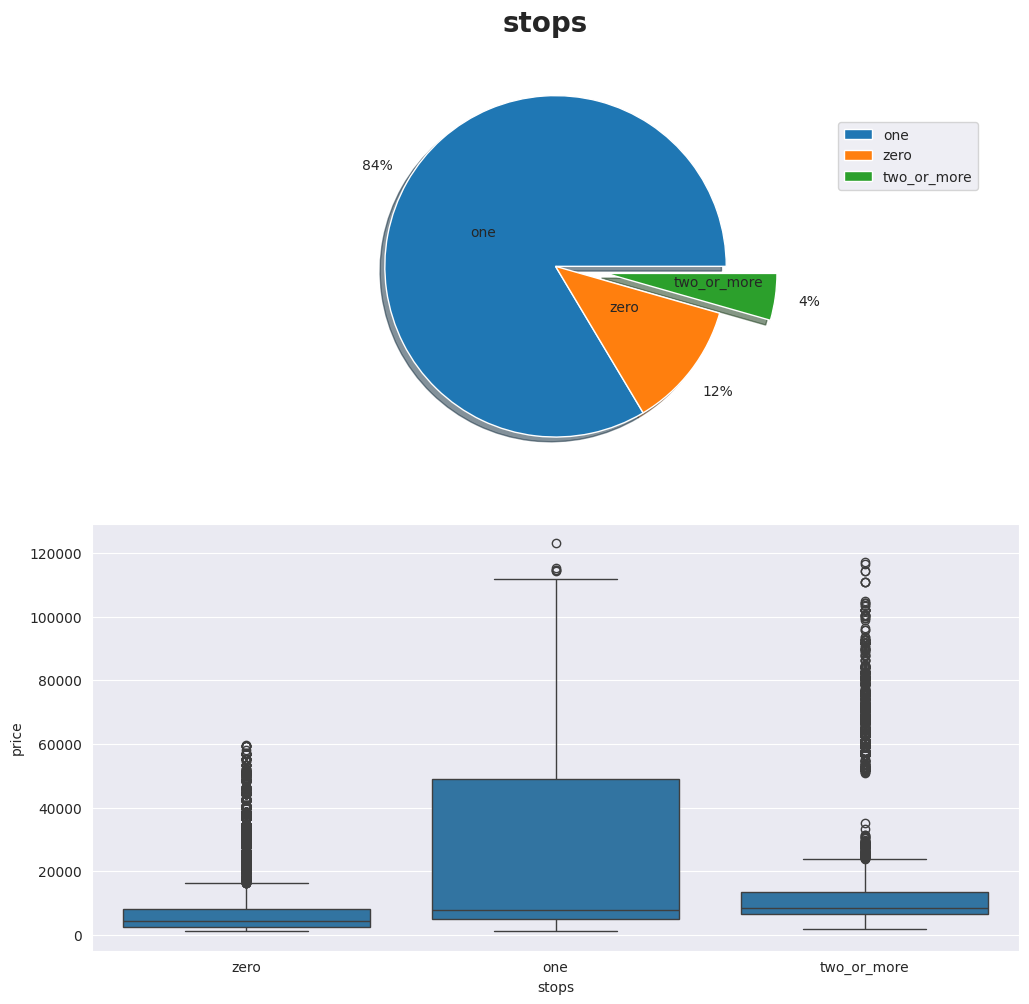

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(data.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=data, ax=ax[1])
plt.show()

In [ ]:
data.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


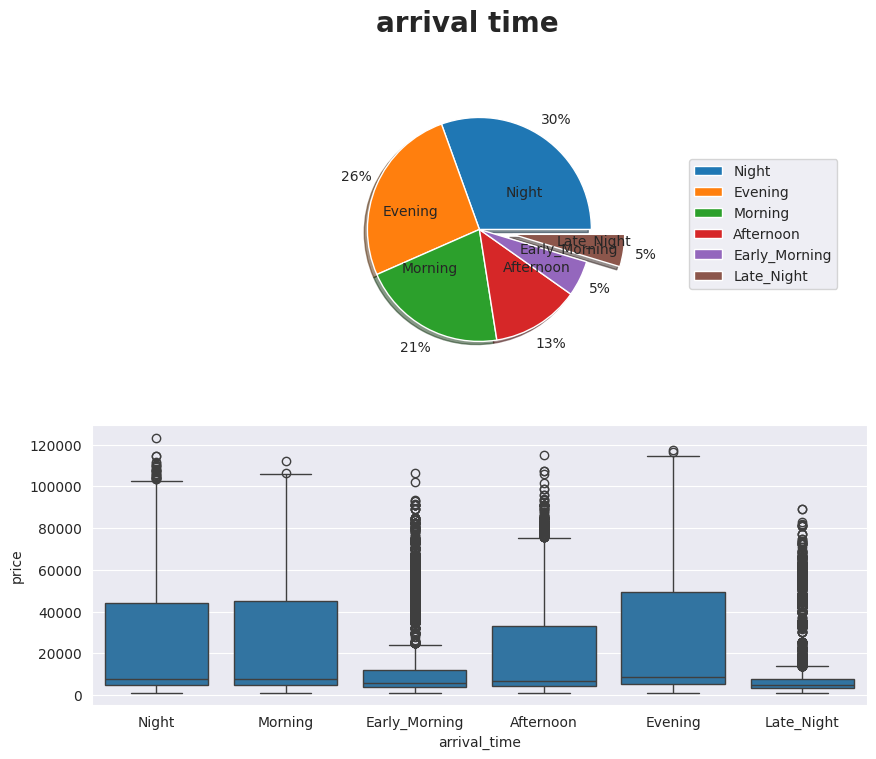

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# Top ax
labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1])
plt.show()

In [ ]:
data.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


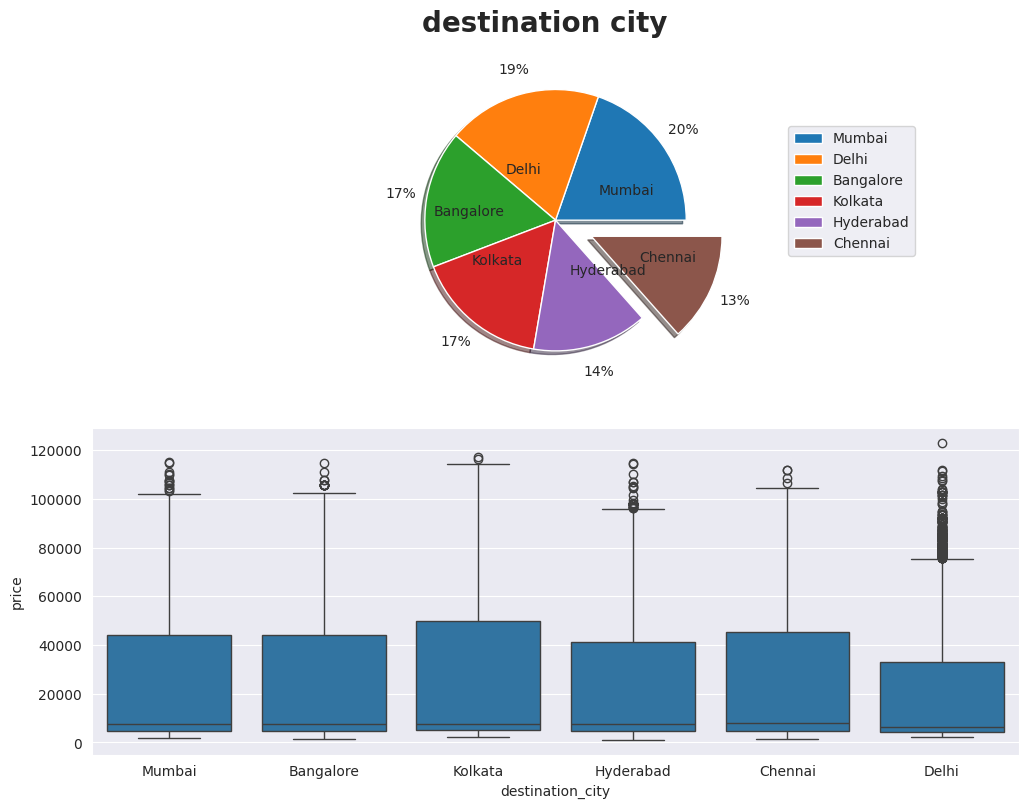

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1])
plt.show()

In [ ]:
data.flight_class.value_counts()

,count
flight_class,
Economy,206666
Business,93487


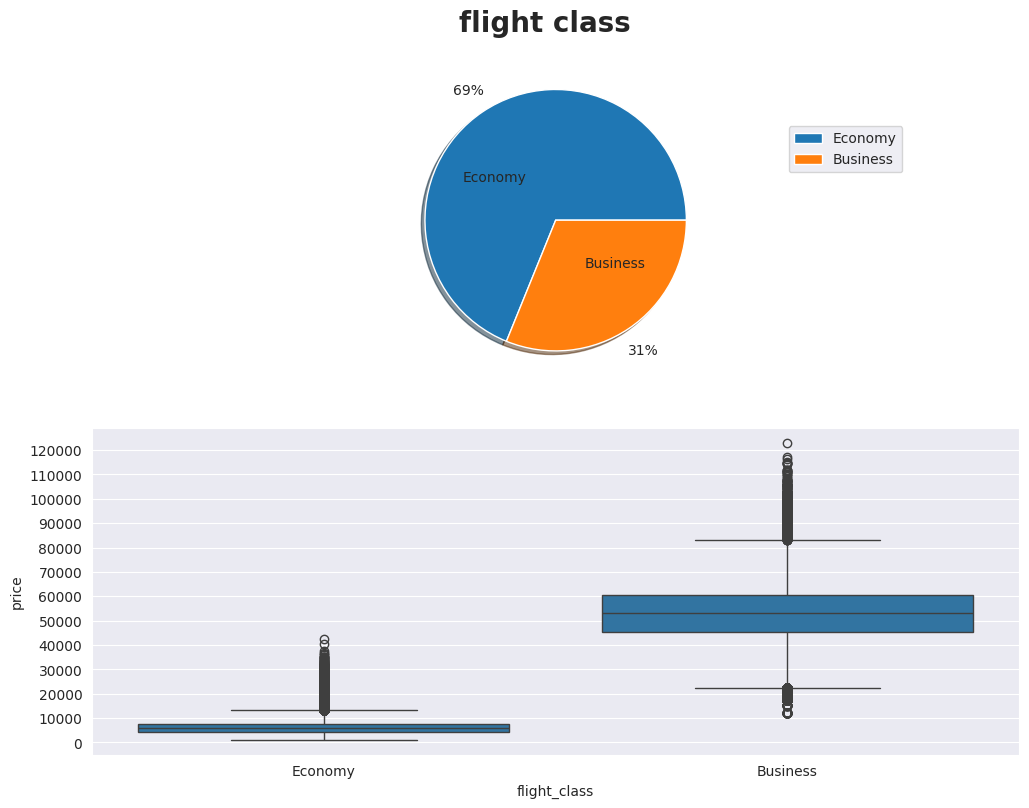

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

In [ ]:
len(data.duration.value_counts())

476

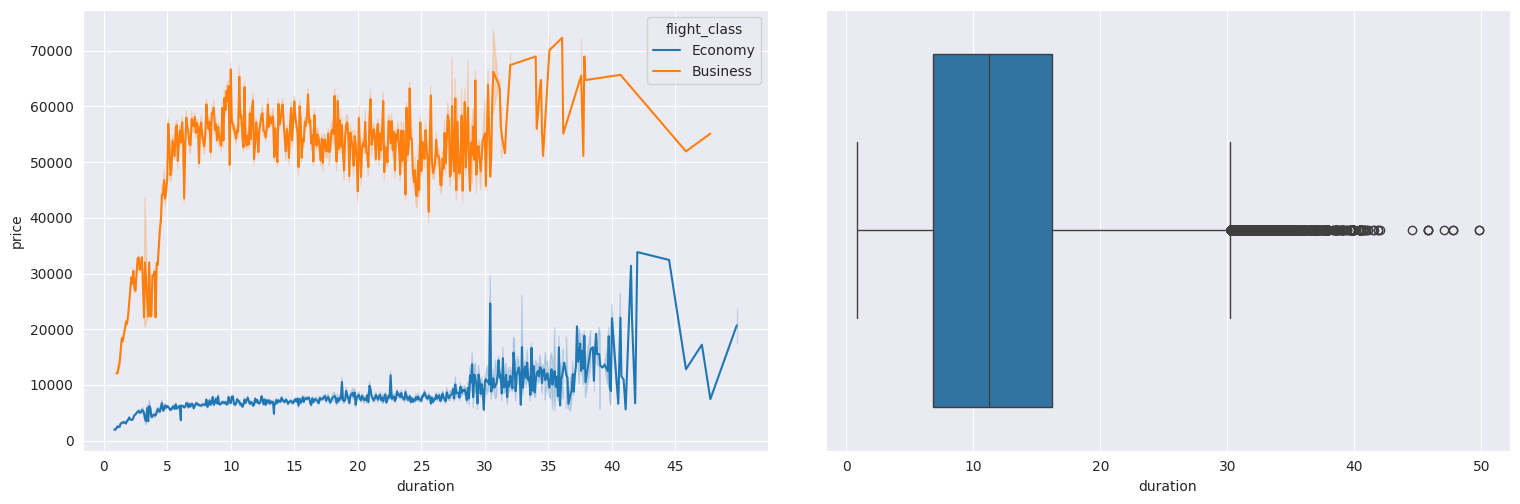

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='duration', ax=ax[1])
plt.show()

In [ ]:
len(data.days_left.value_counts())

49

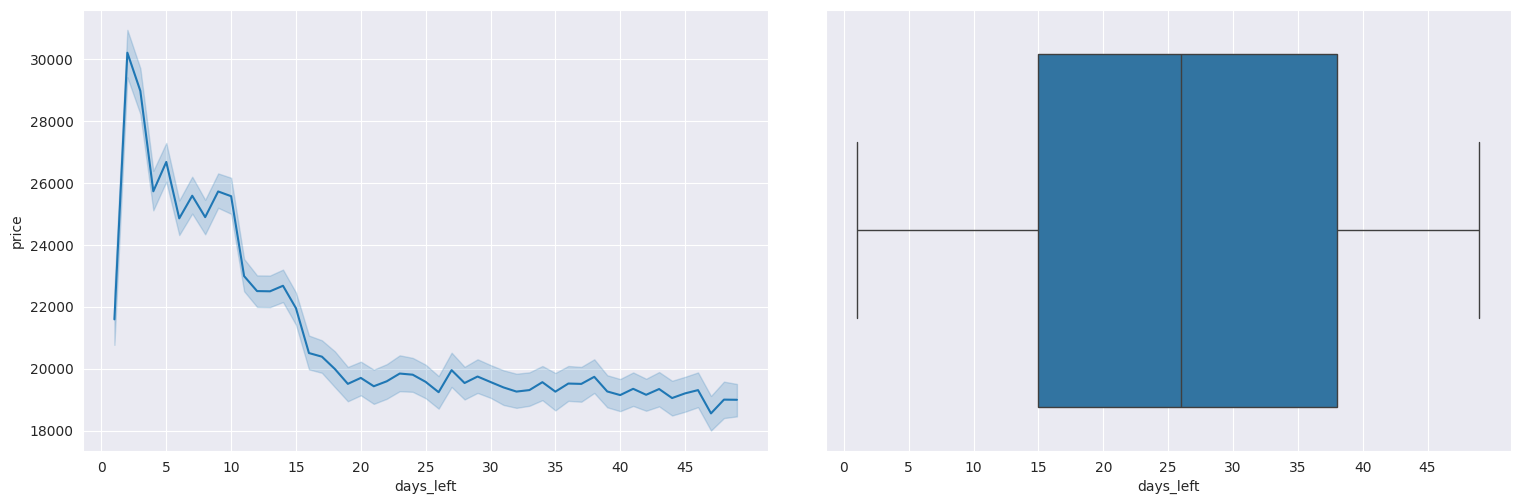

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

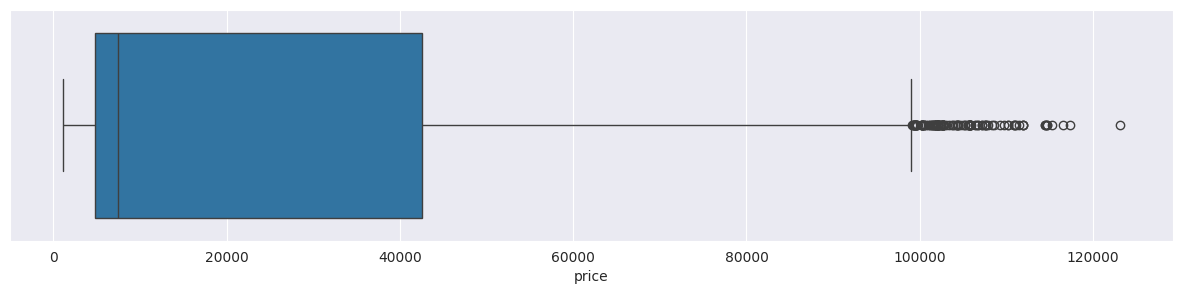

In [ ]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

In [13]:
# col : airline
data.airline = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6
    }
)

In [14]:
# col : source_city
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [15]:
# col : departure_time
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2,
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5,
        'Late_Night' : 6
    }
)

In [16]:
# col : stops
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [17]:
# col : arrival_time
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [18]:
# col : destination_city
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [19]:
# col : flight_class
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

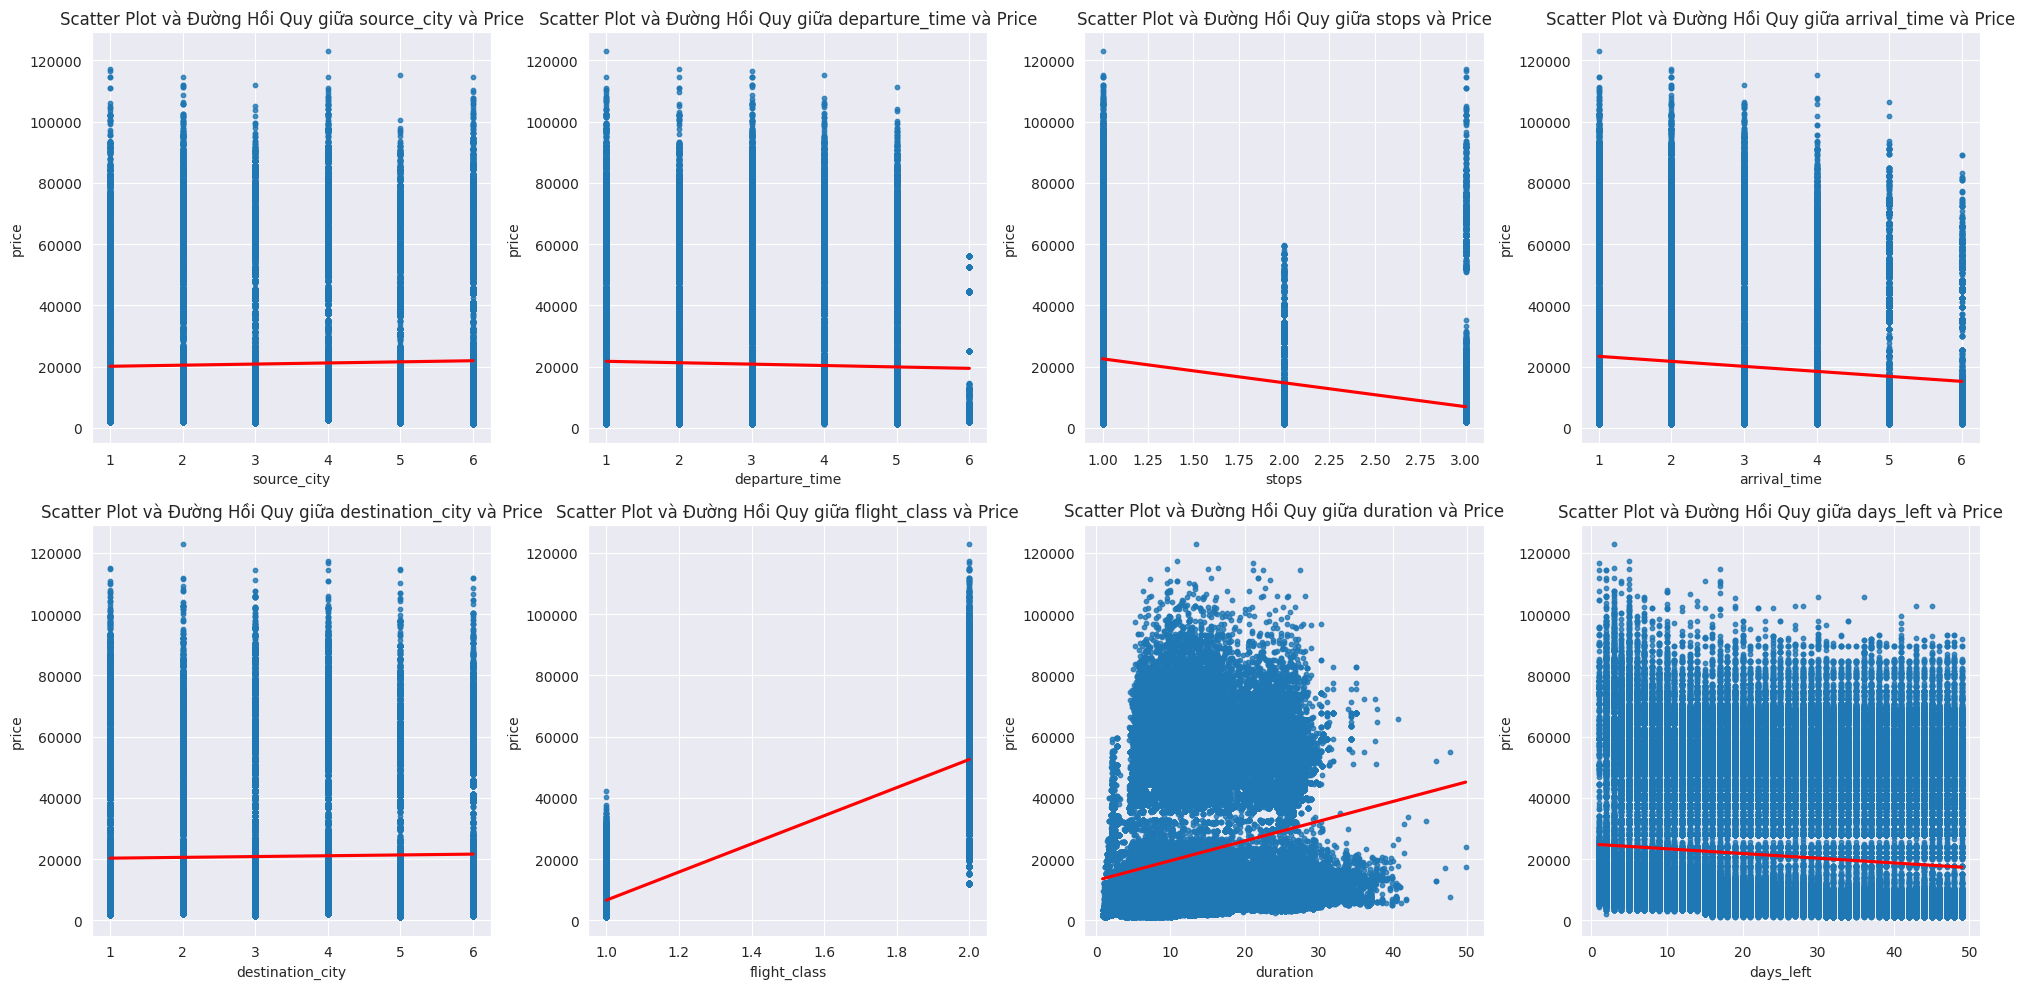

In [21]:
columns_to_plot = ['source_city', 'departure_time', 'stops', 'arrival_time',
                   'destination_city', 'flight_class', 'duration', 'days_left']
plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)

    if data[column].dtype == 'object':
        sns.boxplot(x=column, y='price', data=data)
        plt.title(f'Boxplot giữa {column} và Price')
    else:
        sns.regplot(x=column, y='price', data=data, scatter_kws={'s': 10}, line_kws={"color": "red"})
        plt.title(f'Scatter Plot và Đường Hồi Quy giữa {column} và Price')

    plt.tight_layout()

plt.show()

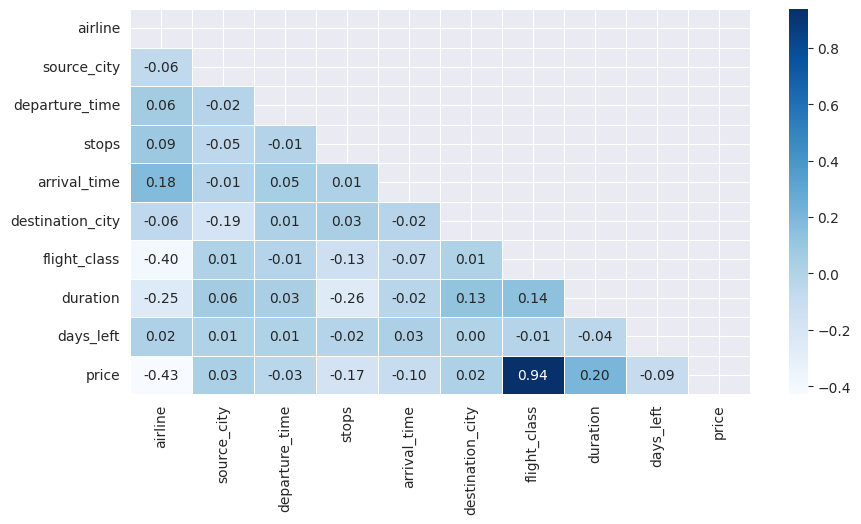

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [ ]:
X_temp = data.drop(columns='price')
y = data.price

In [ ]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

In [ ]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
arrival_time,0.000000,0.299769,0.281568,0.200000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000
price,0.000000,0.162215,0.186099,0.051818,1.000000


Phân tích dự báo

In [ ]:
main_X = X.copy()

Best test_size : 0.15
Best R2Score : 0.8966402677524069
Best Mean Squared Error : 52819242.41679669


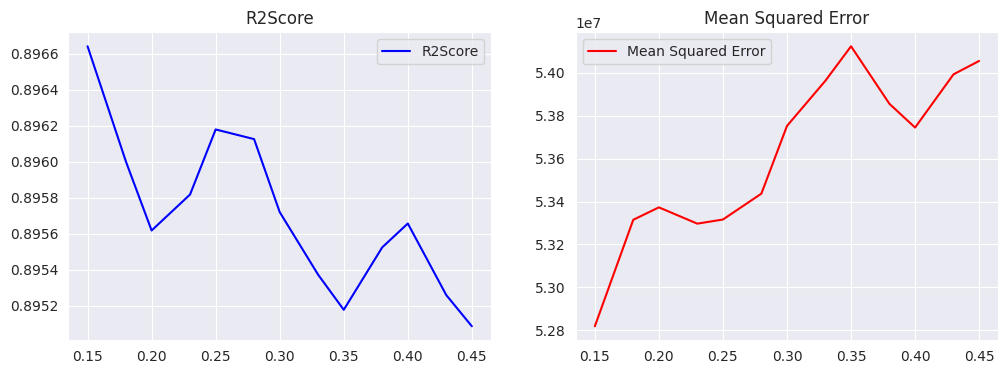

In [ ]:
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    lr = LinearRegression().fit(X, y)
    y_pred_lr = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred_lr)
    r2score_list.append(r2score)
    mse = metrics.mean_squared_error(y_test, y_pred_lr)
    mse_list.append(mse)
    if r2score>best_r2 :
        best_r2 = r2score
        best_mse = mse
        best_test = tester
print('Best test_size : {}'.format(best_test))
print('Best R2Score : {}'.format(best_r2))
print('Best Mean Squared Error : {}'.format(best_mse))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

In [ ]:
for power in range(2, 7) :
    new_col_name = 'flight_class^' + str(power)
    X[new_col_name] = pow(X.flight_class, power)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if r2score > best_r2 :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))

flight_class^2 Not improve r2score
flight_class^3 Not improve r2score
flight_class^4 Not improve r2score
flight_class^5 Not improve r2score
flight_class^6 Not improve r2score


In [ ]:
columns = X.columns
for col in columns :
    new_col_name = 'flight_class*' + col
    X[new_col_name] = X.flight_class * X[col]
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if (r2score > best_r2) and (diff>=0.001) :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))

flight_class*airline improve r2score by 0.008893798233847061
flight_class*source_city Not improve r2score
flight_class*departure_time Not improve r2score
flight_class*stops improve r2score by 0.010364295426905201
flight_class*arrival_time Not improve r2score
flight_class*destination_city Not improve r2score
flight_class*flight_class Not improve r2score
flight_class*duration Not improve r2score
flight_class*days_left Not improve r2score


In [ ]:
lr_r2 = best_r2
print(colored('Linear Legresion R2Score = {}'.format(round(lr_r2, 3)), 'green'))

Linear Legresion R2Score = 0.916


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rate(y_test, y_test_predict, y_train, y_train_predict):
    # RMSE trên tập test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    # RMSE trên tập train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
    # R2 Score trên tập test
    r2 = r2_score(y_test, y_test_predict)

    # In kết quả
    print(f"RMSE Test: {rmse_test:.2f}")
    print(f"RMSE Train: {rmse_train:.2f}")
    print(f"R2 Score: {r2:.2f}")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
list_feature = []
feature_X_new = X.shape[1]

for i in range(1, feature_X_new):
  k_best = SelectKBest(score_func=f_regression, k=i)
  X_select = k_best.fit_transform(X, y)
  best_feature_names = X.columns[k_best.get_support()]
  list_feature.append(best_feature_names)

def all_result(best_feature_names, X_new, y_new):
  x = X_new[best_feature_names]
  y = y_new

  x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state = 42)

  re_2feature = LinearRegression()
  re_2feature.fit(x_train_2, y_train_1)

  y_test_predict = re_2feature.predict(x_test_2)
  Y_train_predict = re_2feature.predict(x_train_2)
  rate(y_test_1, y_test_predict, y_train_1, Y_train_predict)

  coefficients = re_2feature.coef_
  intercept = re_2feature.intercept_
  feature_equation = " + ".join(
    [f"{coef:.2f} * {feature}" for coef, feature in zip(coefficients, best_feature_names)]
  )
  regression_equation = f"y = {intercept:.2f} + {feature_equation}"

  print("Phương trình hồi quy tuyến tính:")
  print(regression_equation)

for i in list_feature:
  print('feature: ', i)
  all_result(i, X, y)

feature:  Index(['flight_class'], dtype='object')
RMSE Test: 7864.27
RMSE Train: 7879.44
R2 Score: 0.88
Phương trình hồi quy tuyến tính:
y = 6575.60 + 45964.51 * flight_class
feature:  Index(['airline', 'flight_class'], dtype='object')
RMSE Test: 7751.47
RMSE Train: 7767.38
R2 Score: 0.88
Phương trình hồi quy tuyến tính:
y = 8196.99 + -5352.37 * airline + 44719.76 * flight_class
feature:  Index(['airline', 'flight_class', 'flight_class*airline'], dtype='object')
RMSE Test: 7495.73
RMSE Train: 7508.63
R2 Score: 0.89
Phương trình hồi quy tuyến tính:
y = 7659.93 + -3579.48 * airline + 47820.16 * flight_class + -38200.17 * flight_class*airline
feature:  Index(['airline', 'flight_class', 'duration', 'flight_class*airline'], dtype='object')
RMSE Test: 7315.73
RMSE Train: 7319.43
R2 Score: 0.90
Phương trình hồi quy tuyến tính:
y = 4573.03 + -1946.17 * airline + 47920.00 * flight_class + 11848.55 * duration + -41542.35 * flight_class*airline
feature:  Index(['airline', 'stops', 'flight_class',

In [ ]:
def print_results_table(fold_details, average_rmse, average_r2, average_train_time, average_test_time):
    df_details = pd.DataFrame(fold_details)
    print("\nBảng chi tiết từng tập")
    print(tabulate(df_details, headers="keys", tablefmt="pretty", showindex=False))
    print("\n")
    summary = [
        [f"Trung bình RMSE", f"{average_rmse:.4f}"],
        [f"Trung bình R2", f"{average_r2:.4f}"],
        [f"Thời gian train trung bình", f"{average_train_time:.4f} giây"],
        [f"Thời gian test trung bình", f"{average_test_time:.4f} giây"],
    ]

    print("Kết quả tổng hợp")
    print(tabulate(summary, headers=["Thông số", "Giá trị"], tablefmt="pretty"))

In [ ]:
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

X_values = X.values
y_values = y.values
train_times = []
test_times = []
rmse_results = []
r2_results = []

fold_details = []
for train_index, test_index in kf.split(X_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    train_times.append(train_time)

    start_test = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_test
    test_times.append(test_time)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_results.append(rmse)
    r2_results.append(r2)

    fold_details.append({
        'Tập': len(fold_details) + 1,
        'Thời gian huấn luyện (giây)': train_time,
        'Thời gian kiểm thử (giây)': test_time,
        'RMSE': rmse,
        'R2': r2
    })

average_rmse = np.mean(rmse_results)
average_r2 = np.mean(r2_results)
average_train_time = np.mean(train_times)
average_test_time = np.mean(test_times)

print_results_table(fold_details, average_rmse, average_r2, average_train_time, average_test_time)


Bảng chi tiết từng tập
+------+-----------------------------+---------------------------+--------------------+--------------------+
| Tập  | Thời gian huấn luyện (giây) | Thời gian kiểm thử (giây) |        RMSE        |         R2         |
+------+-----------------------------+---------------------------+--------------------+--------------------+
| 1.0  |     0.14144420623779297     |   0.0011699199676513672   | 6649.925034842332  | 0.9141262287970779 |
| 2.0  |     0.21736907958984375     |   0.0013740062713623047   | 6582.921904728706  | 0.9160154475570652 |
| 3.0  |     0.19714784622192383     |   0.0012154579162597656   | 6624.115383385546  | 0.914474585873066  |
| 4.0  |     0.25216221809387207     |   0.008532285690307617    | 6608.340267882347  | 0.9159008417070583 |
| 5.0  |     0.22966551780700684     |   0.005312204360961914    | 6560.2941146414705 | 0.9160520733008883 |
| 6.0  |     0.18693923950195312     |   0.005257129669189453    | 6593.607236730554  | 0.91594742540843